### Steps

1. Load library python
2. Load dataset
3. Sneak peak data
4. Handling missing values
5. Hypothesis Testing by T test and ANOVA test
5. Exploratory Data Analysis (EDA)
6. Modelling
7. Prediction

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.shape

(244, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
X = df[['total_bill']]
y = df['tip']

In [8]:
from sklearn import linear_model

In [9]:
Model = linear_model.LinearRegression()

In [10]:
Model.fit(X, y)

LinearRegression()

### y = ax + b

In [11]:
# a = gradien
Model.coef_[0]

0.10502451738435337

In [12]:
# b = titik potong
Model.intercept_

0.9202696135546731

In [14]:
Model.predict(X)

array([2.70463616, 2.00622312, 3.12683472, 3.40725019, 3.5028225 ,
       3.57633966, 1.84133463, 3.74332864, 2.49983836, 2.47253198,
       1.99887141, 4.6234341 , 2.53974767, 2.85587147, 2.47778321,
       3.1866987 , 2.00517288, 2.631119  , 2.70253567, 3.0890259 ,
       2.80230897, 3.05121707, 2.57650625, 5.06033609, 3.00185555,
       2.79075627, 2.32444741, 2.25303074, 3.19930164, 2.98400138,
       1.92325375, 2.84746951, 2.50193885, 3.09322688, 2.78760553,
       3.4471595 , 2.63321949, 2.69833469, 2.88317784, 4.20438627,
       2.60486287, 2.75399769, 2.38431139, 1.93690694, 4.11301494,
       2.84116804, 3.25496464, 4.32306398, 3.91871958, 2.81491191,
       2.23727706, 2.0009719 , 4.57617306, 1.96421332, 3.60469628,
       2.96719746, 4.91225152, 3.69396712, 2.10074519, 5.98980307,
       3.05121707, 2.3706582 , 2.0776398 , 2.84116804, 2.76765087,
       3.02916192, 2.64792292, 1.24269488, 3.0449156 , 2.49668762,
       2.18266431, 2.71303813, 3.74122815, 3.57528941, 2.46728

In [16]:
df['Predicted Tips'] = Model.predict(X)
df.head()

,total_bill,tip,sex,smoker,day,time,size,Predicted Tips
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822


In [18]:
df['Error'] = abs(df['tip']-df['Predicted Tips'])
df.head()

,total_bill,tip,sex,smoker,day,time,size,Predicted Tips,Error
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,0.373165
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,0.107178


In [19]:
# Mean Absolute Error
df['Error'].mean()

0.7458253894586337

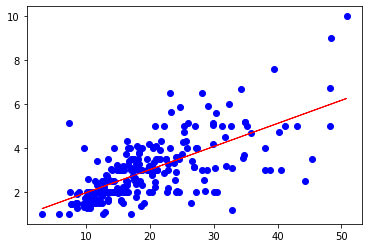

In [43]:
plt.scatter(df['total_bill'], df['tip'], color="blue")
plt.plot(df['total_bill'], df['Predicted Tips'], color="red", linewidth=1)
plt.show()

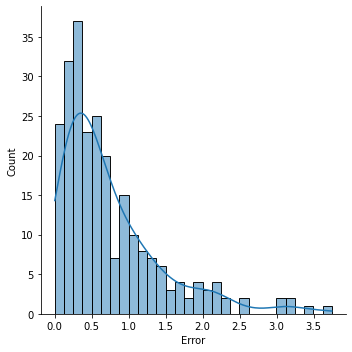

In [25]:
sns.displot(df['Error'], bins=30, kde=True)

### One Sample T Test
Memeriksa apakah rata-rata sampel data Tips sama dengan rata-rata populasi data Tips, sehingga:
- H0 : Rata-rata sampel = rata-rata populasi
- Ha : Rata-rata sampel tidak sama dengan rata-rata populasi

In [28]:
from scipy.stats import ttest_1samp

In [31]:
tval, pval = ttest_1samp(df['tip'], 0)

if pval < 0.05:
    print('Tolak H0, rata-rata sampel tidak sama dengan rata-rata populasi')
else:
    print('Terima H0, rata-rata sampel = rata-rata populasi')

Tolak H0, rata-rata sampel tidak sama dengan rata-rata populasi


### Two Sample Independent T test
Memeriksa apakah pelanggan wanita memberikan tips yang rata-rata sama dengan rata-rata tips yang diberikan pelanggan pria
- H0 : Rata-rata tips yang diberikan pelanggan wanita = rata-rata tips yang diberikan pelanggan pria
- Ha : Rata-rata tips yang diberikan pelanggan wanita tidak sama dengan rata-rata tips yang diberikan pelanggan pria

In [32]:
from scipy.stats import ttest_ind

In [34]:
tval, pval = ttest_ind(
df[df['sex'] == 'Female']['tip'],
df[df['sex'] == 'Male']['tip'],
equal_var = False
)
if pval < 0.05:
    print('Tolak H0')
else:
    print('Terima H0')

Terima H0


#### Kesimpulan:
Pelanggan wanita memberikan tips yang rata-ratanya sama dengan rata-rata tips yang diberikan pelanggan pria, tidak ada perbedaan signifikan pemberi tips pria maupun wanita

### One-Way Anova Test  (F- test)

In [35]:
from scipy.stats import f_oneway

In [36]:
fval, pval = f_oneway(df['total_bill'],df['tip'])

if pval < 0.05:
    print('Tolak H0')
else:
    print('Terima H0')

Tolak H0
